In [1]:
import pandas as pd

df =pd.read_csv("iris.csv")
print (df.shape)

print(df.head(5))

#Checking Data Types
print (df.dtypes)


(150, 5)
   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object


In [2]:
#Checking Data Types
print (df.dtypes)

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object


In [3]:
#checking rows for duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicated rows: ", duplicate_rows_df.shape)

number of duplicated rows:  (3, 5)


In [4]:
#dropping the duplicates
df = df.drop_duplicates()
#Counting the rows after removing the duplicates
df.count()

sepal length    147
sepal width     147
petal length    147
petal width     147
class           147
dtype: int64

In [5]:
#count the number of null values in each column
print(df.isnull().sum())

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64


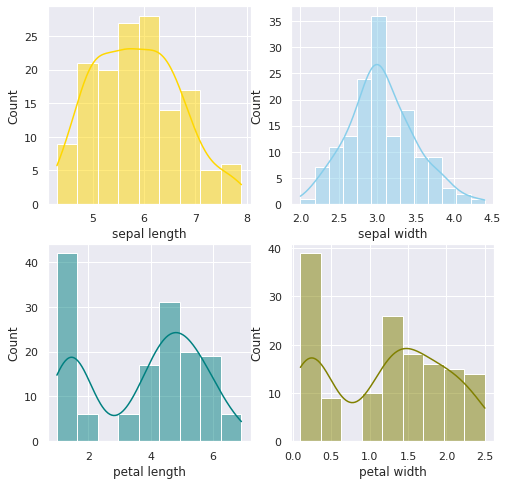

In [6]:
#import libraries
import seaborn as sns
import matplotlib.pyplot as plt

#set a grey background
sns.set_theme(style='darkgrid')

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
sns.histplot(data=df, x="sepal length",kde=True, color="gold", ax=axs[0, 0])
sns.histplot(data=df, x="sepal width",kde=True, color="skyblue", ax=axs[0, 1])
sns.histplot(data=df, x="petal length",kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=df, x="petal width",kde=True, color="olive", ax=axs[1, 1])

plt.show()

In [7]:
#create a datafram with all variables except the class column
X = df.drop(['class'], axis=1)

#check that the class variable has been removed
X.head()



,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
#separate target values
y =df['class'].values

#view target values
print(y[0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [9]:
#use the "train_test_split" function to split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_Vali_test, y_train, y_Vali_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

print(X_train.shape)

(117, 4)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

TypeError: n_neighbors does not take <class 'float'> value, enter integer value

In [ ]:
#show the first 5 model predictions on the test data
print ("Model predictions: ", knn.predict(X_Vali_test)[0:5])

Model predictions:  ['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica']


In [ ]:
#Check accuract of our model on the test data 
knn.score(X_Vali_test, y_Vali_test)

0.9